<a href="https://colab.research.google.com/github/oscar-unir/TIA/blob/main/ML_Explorar_%2B_Visualizar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explorar y visualizar datos con python

En este ejemplo vamos a explorar el famoso dataset Iris, el cual incluye una clase que corresponde 
al tipo de planta Iris y cuatro atributos numéricos, ancho y largo del pétalo y el sépalo, que permiten clasificar
las plantas en una clase u otra.

Debido a problemas con los certificados en Mac, deben añadirse las dos líneas siguientes para importar correctamente ficheros de forma segura.

In [17]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [18]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

In [19]:
url = "https://www.openml.org/data/get_csv/61/dataset_61_iris.arff"

Asignamos el dataset en un objeto, es similar a un diccionario contiene keys y values:

In [20]:
dataset = read_csv(url)

Mostramos la "forma", debería haber 150 entradas con 5 atributos cada una:

In [21]:
print(dataset.shape)

(150, 5)


Mostramos las 3 primeras entradas para echar un vistazo:

In [22]:
print(dataset.head(3))

   sepallength  sepalwidth  petallength  petalwidth        class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa


Mostramos un resumen estadístico de los datos:

In [23]:
print(dataset.describe())

       sepallength  sepalwidth  petallength  petalwidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


Distribución por clases:

In [24]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


Dibujemos en primer lugar diagramas de cajas y bigotes con pyplot de matplotlib:

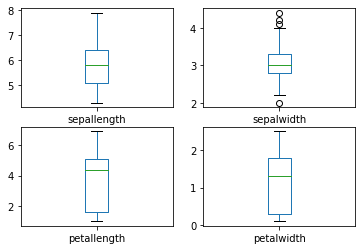

In [25]:
dataset.plot(kind='box',subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

Dibujemos ahora los histogramas:

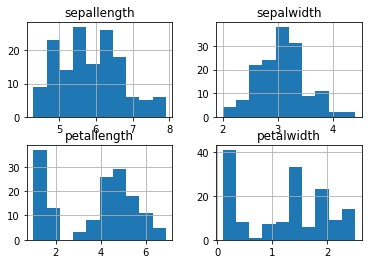

In [26]:
dataset.hist()
pyplot.show()

Y ahora unos gráficos multivariable con la matriz de dispersión:

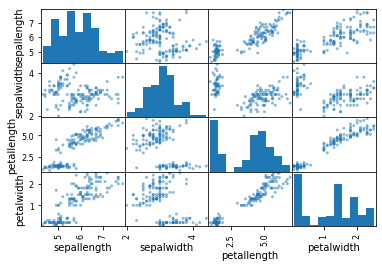

In [27]:
scatter_matrix(dataset)
pyplot.show()

Particionamos el dataset en entrenamiento y pruebas:

In [28]:
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.25, random_state=1, shuffle=True)

Construcción del modelo con k nearest neighbors. Utilizaremos k=1
Cargamos la clase de scikit que contiene el algoritmo.
El algortimo está encapsulado en el objeto knn. Para construir el modelo con el conjunto de entrenamiento tenemos que llamar a la función fit que empareja datos con etiquetas.

In [29]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

Damos detalles sobre el modelo:

In [30]:
print(model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


Evaluamos las predicciones, en primer lugar la precisión obtenida:

In [31]:
print(accuracy_score(Y_validation, predictions))

1.0


Hacemos predicciones.
Utilizamos el modelo con nuevos datos (necesitamos hacerlo bidimensional pq scikit-learn siempre espera datos así)

In [32]:
print(model.predict([[6.0, 3.0, 5.0, 2.0]]))

['Iris-virginica']
